# 重载模型并训练

In [1]:
cd ..

D:\kaggle\books\tensorflow-crack


## 载入数据

In [2]:
from utils.loader import load_data
from utils.toml import load_option

options = load_option('options/dataset.toml')
train_gen, val_gen, test_gen = load_data(**options)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## 载入模型

In [3]:
import tensorflow as tf
from utils.log import log_model


def reload_model(model_name, model_root):
    model_name = f'{model_root}/{model_name}.h5'
    model = tf.keras.models.load_model(model_name)
    return model

In [4]:
train_options = load_option('options/train.toml')

In [5]:
model = reload_model('resnet152', train_options.model_root)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 59,420,545
Trainable params: 1,049,601
Non-trainable params: 58,370,944
_________________________________________________________________


## 训练模型

Epoch 1/10
75/75 [==============================] - 33s 271ms/step - loss: 0.0957 - accuracy: 0.9650 - val_loss: 0.0453 - val_accuracy: 0.9900
Epoch 2/10
75/75 [==============================] - 15s 196ms/step - loss: 0.1279 - accuracy: 0.9633 - val_loss: 0.0200 - val_accuracy: 0.9950
Epoch 3/10
75/75 [==============================] - 15s 197ms/step - loss: 0.0482 - accuracy: 0.9833 - val_loss: 0.0780 - val_accuracy: 0.9650
Epoch 4/10
75/75 [==============================] - 15s 195ms/step - loss: 0.0461 - accuracy: 0.9850 - val_loss: 0.1395 - val_accuracy: 0.9350
Epoch 5/10
75/75 [==============================] - 15s 195ms/step - loss: 0.0678 - accuracy: 0.9783 - val_loss: 0.0725 - val_accuracy: 0.9750
Epoch 6/10
75/75 [==============================] - 15s 195ms/step - loss: 0.0253 - accuracy: 0.9883 - val_loss: 0.0461 - val_accuracy: 0.9900
Epoch 7/10
75/75 [==============================] - 15s 195ms/step - loss: 0.0455 - accuracy: 0.9850 - val_loss: 0.0658 - val_accuracy: 0.9800

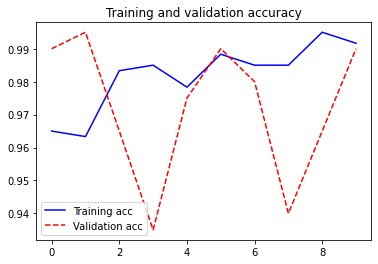

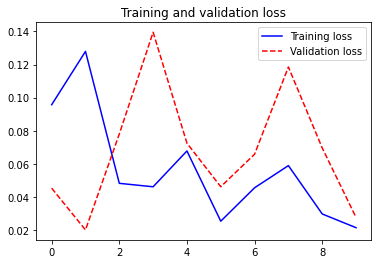

C:\Users\xinet\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [6]:
# 儲存模型
model_name = 'resnet152A-reload'
log_model(model, model_name,
          train_gen, val_gen,
          **train_options)

## 测试模型

In [7]:
def test_result(model, test_generator, batch_size):
    results = model.evaluate(x=test_generator,
                             batch_size=batch_size,
                             return_dict=True)
    return results

In [8]:
results = test_result(model, test_gen, batch_size=8)

25/25 [==============================] - 3s 104ms/step - loss: 0.0060 - accuracy: 1.0000
